# MLOps

In [1]:
import pandas as pd

historical = pd.read_csv('historical.csv')
new_data = pd.read_csv('new_data.csv')


In [2]:
print("Estatísticas descritivas - Dados históricos")
print(historical.describe())

print("\nEstatísticas descritivas - Novos dados")
print(new_data.describe())


Estatísticas descritivas - Dados históricos


       Length of Username  Country Block_1  Country Block_2  \
count         2000.000000           2000.0      2000.000000   
mean             0.513242              0.0         0.003500   
std              0.100227              0.0         0.059072   
min              0.338443              0.0         0.000000   
25%              0.432568              0.0         0.000000   
50%              0.494676              0.0         0.000000   
75%              0.573195              0.0         0.000000   
max              0.953919              0.0         1.000000   

       Number of Followers  Number of Posts  Number of Mutual Followers  \
count          2000.000000      2000.000000                 2000.000000   
mean              0.352259         0.617551                    0.452278   
std               0.076940         0.073240                    0.073929   
min               0.027737         0.518869                    0.000000   
25%               0.305230         0.559407              

In [3]:
common_columns = list(set(historical.columns).intersection(set(new_data.columns)))

if 'Class' not in common_columns:
    print("A coluna 'Class' não está presente em ambos os dataframes.")
else:
    print("A coluna 'Class' está presente em ambos os dataframes.")


A coluna 'Class' não está presente em ambos os dataframes.



# Teste de Hipótese para detecção de drift

1. Querermos saber se uma variável específica sofreu algum
“drift”, ´´e aconselhada a utilização de técnicas mono-variável. Baseados nos dados fornecidos
(historical.csv + new_data.csv), pf indique se existe algum “drift”, e se sim, indique quais as variáveis
que sofreram esse “drift” e explique o porquê de as ter considerado?

 * KS test e Chi-Square test

In [4]:
from scipy.stats import ks_2samp, chi2_contingency

# Função para detectar drift em variáveis contínuas
def test_continuous_variable_drift(hist_data, new_data):
    result = ks_2samp(hist_data, new_data)
    return result.pvalue

# Função para detectar drift em variáveis categóricas
def test_categorical_variable_drift(hist_data, new_data):
    contingency_table = pd.crosstab(hist_data, new_data)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

drift_results = {}
for column in common_columns:
    if pd.api.types.is_numeric_dtype(historical[column]):
        p_value = test_continuous_variable_drift(historical[column], new_data[column])
    else:
        p_value = test_categorical_variable_drift(historical[column], new_data[column])
    
    drift_results[column] = p_value

# Determinar quais variáveis sofreram drift (p < 0.05)
drifted_variables = {k: v for k, v in drift_results.items() if v < 0.05}
print("\nVariáveis que sofreram drift:")
print(drifted_variables)


Variáveis que sofreram drift:
{'Is Joined Recently': 0.000219534246504725, 'Length of Biography': 4.147950659620703e-10, 'Number of Posts': 0.0, 'Length of Username': 1.453655418056506e-45, 'Is Professional Account': 2.590013392473923e-105, 'Sex': 5.774494239742336e-32, 'Is Business Account': 2.1848880805291417e-09, 'Is Verified': 2.7541086361857144e-236, 'Number of Mutual Followers': 0.0, 'Is Private': 1.6647592525167986e-107, 'Mean Post Likes': 1.6756236686194647e-60, 'Country Block_1': 0.0037704349657562016, 'Number of Followers': 0.0, 'Percentage of Following': 0.0, 'Number of Video Posts': 7.007914649247631e-41}


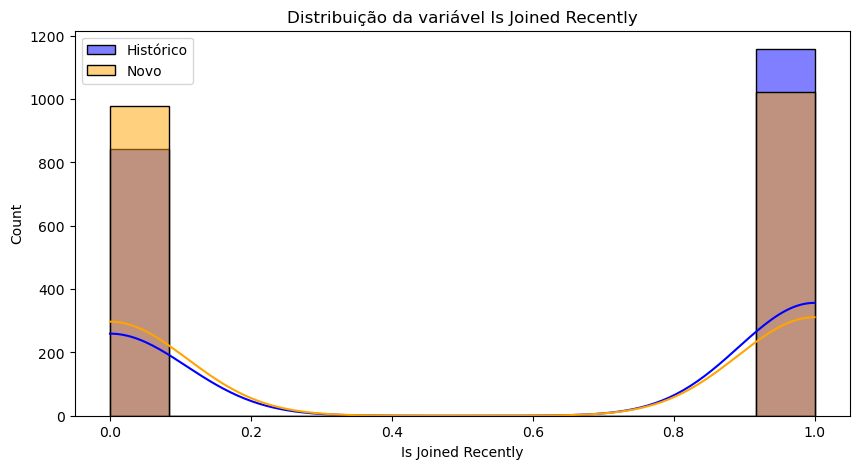

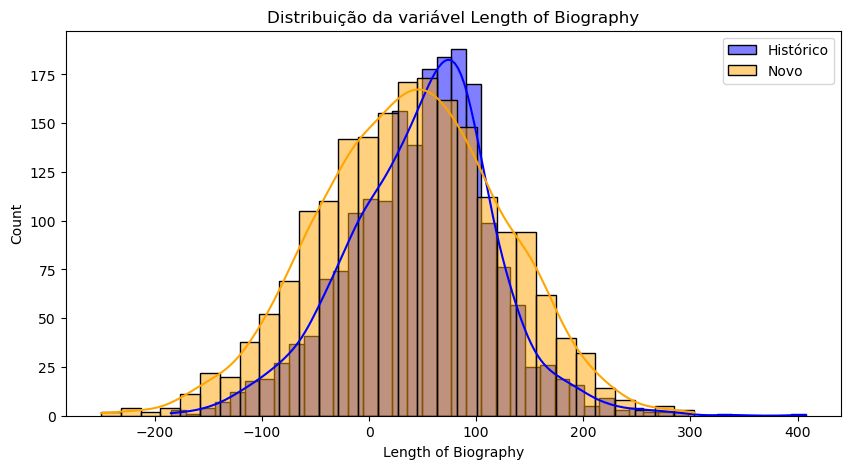

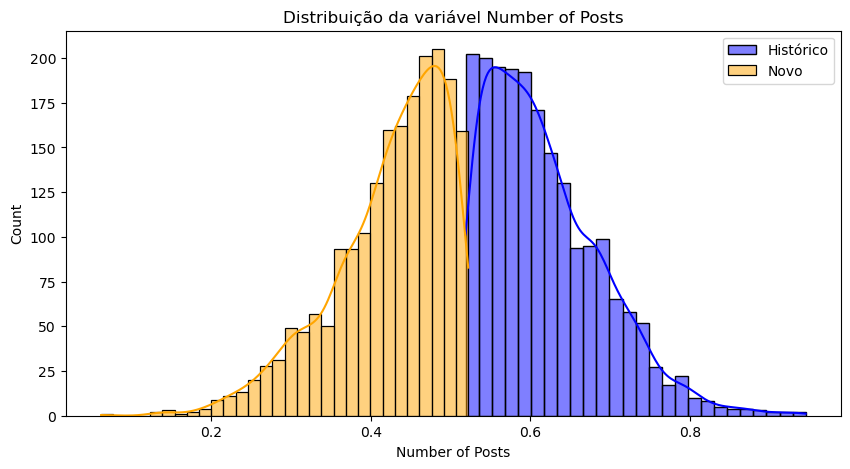

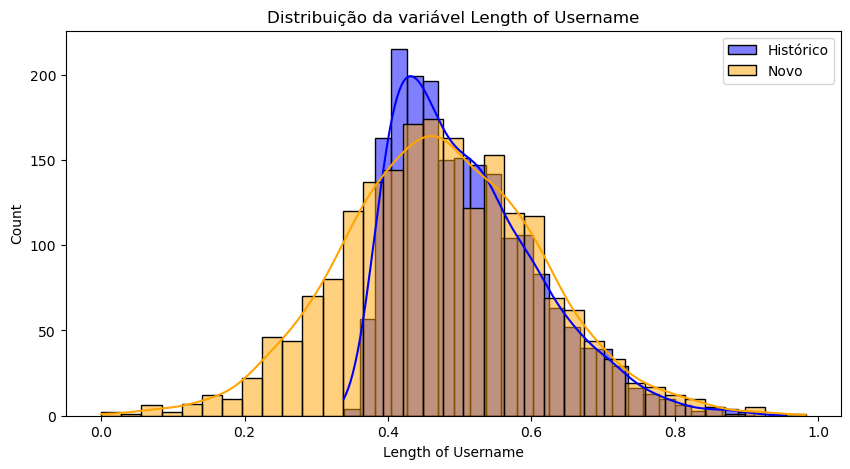

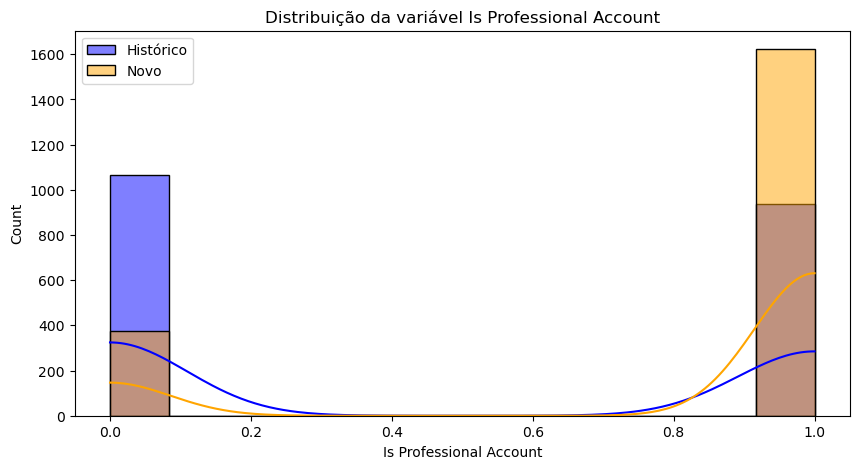

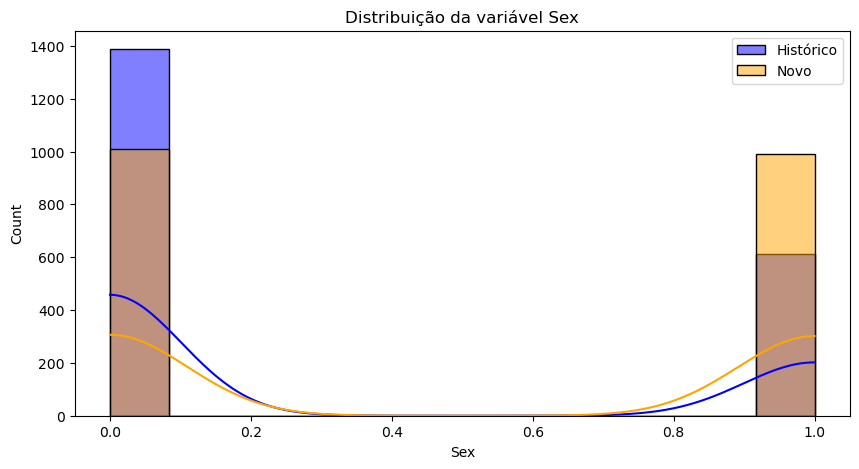

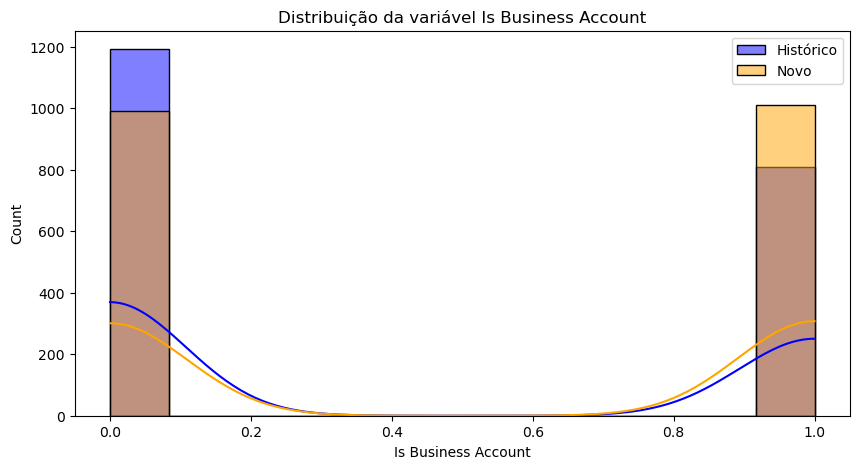

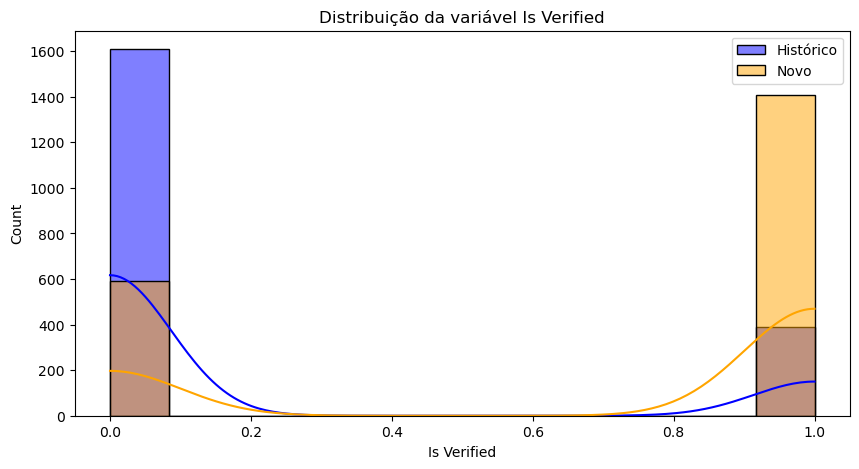

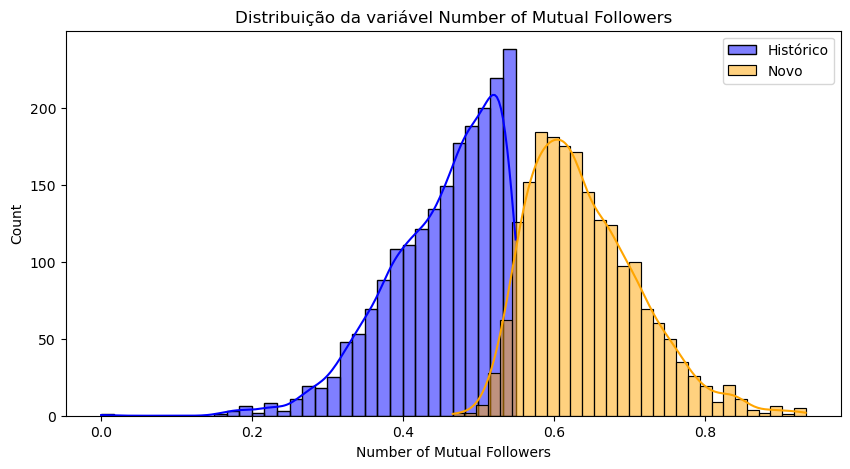

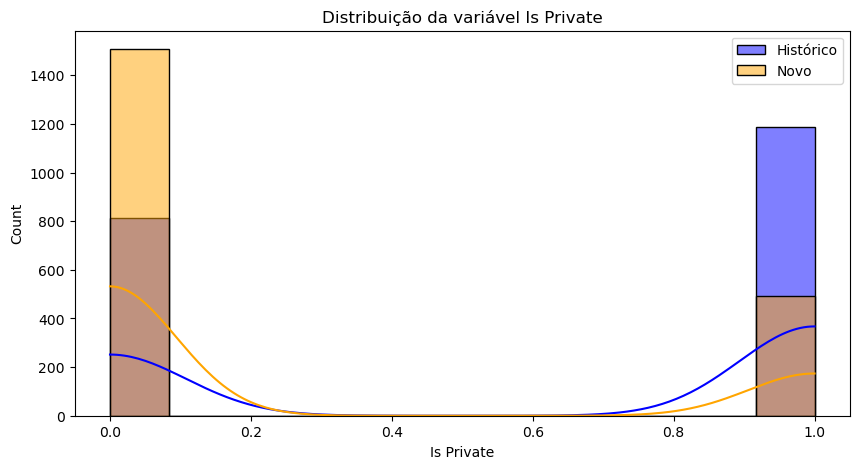

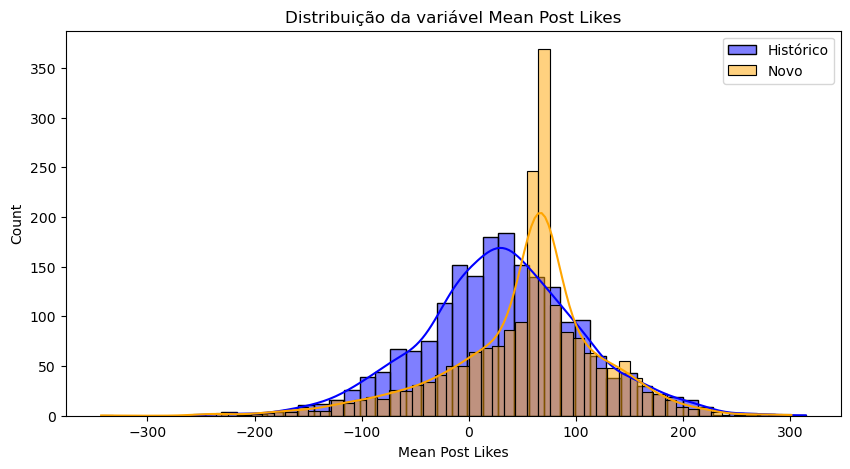

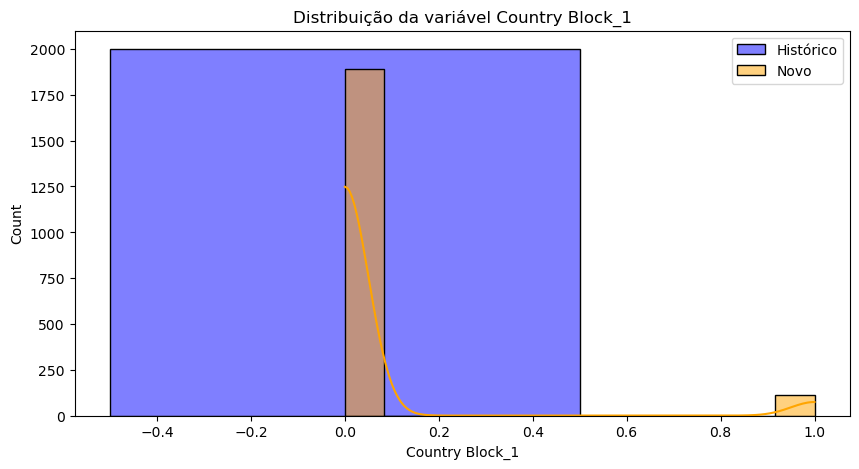

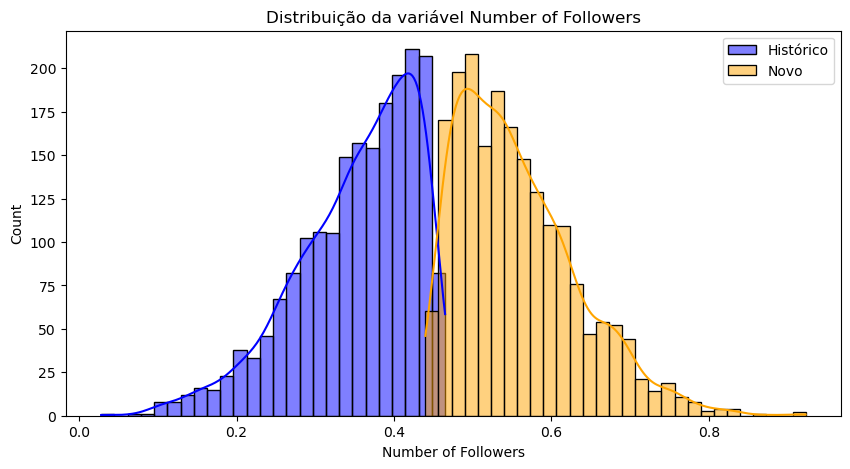

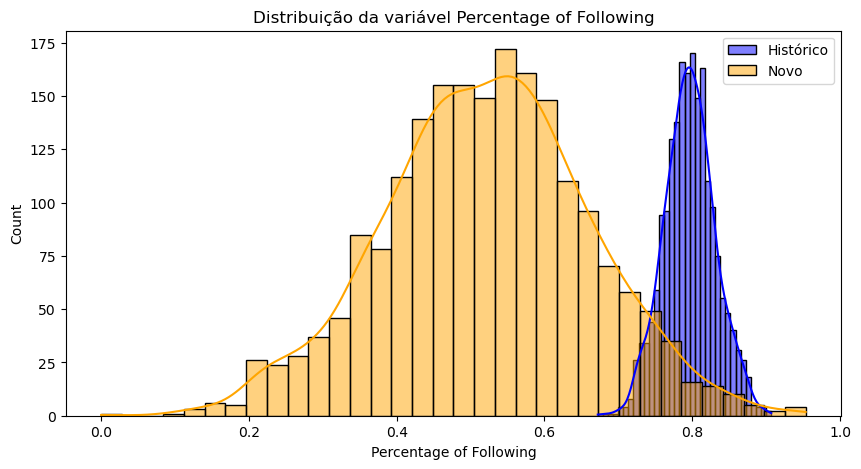

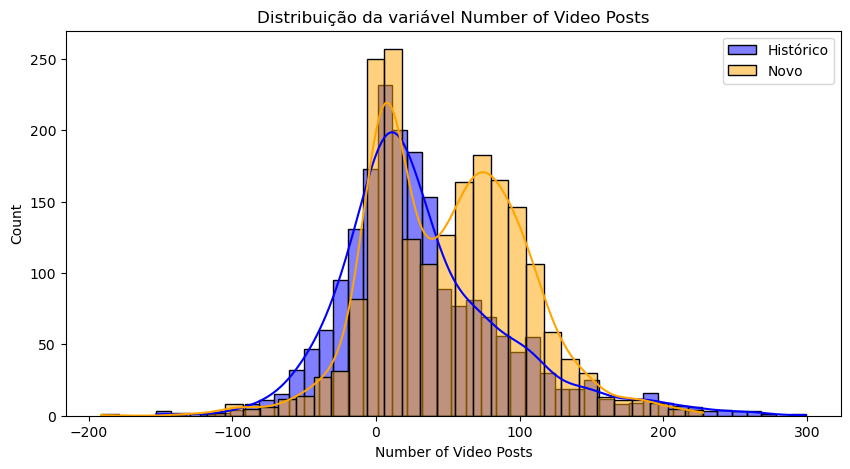

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in drifted_variables.keys():
    plt.figure(figsize=(10, 5))
    sns.histplot(historical[column], color='blue', label='Histórico', kde=True)
    sns.histplot(new_data[column], color='orange', label='Novo', kde=True)
    plt.title(f'Distribuição da variável {column}')
    plt.legend()
    plt.show()

Interpretação:

*Sobreposição completa: Se os histogramas dos dados históricos e novos se sobrepõem completamente, isso sugere que a distribuição da variável não mudou significativamente.

*Diferenças nas barras: Se as barras dos histogramas para os novos dados são significativamente diferentes das barras dos dados históricos, isso indica que houve uma mudança na distribuição da variável.

Abordagem Utilizada para Detectar Drift:

Para detectar o "drift" nos dados entre os dois conjuntos (historical.csv e new_data.csv), a seguinte abordagem foi utilizada:

1. Carregamento dos Dados: Importação dos dados históricos e novos para dataframes Pandas.
2. Verificação de Colunas Comuns: Identificação das colunas que estão presentes em ambos os dataframes para evitar erros de chave.
3. Testes Estatísticos:
 -Teste de Kolmogorov-Smirnov (KS test) para variáveis contínuas, que compara as distribuições cumulativas dos dois conjuntos de dados.
 -Teste de Qui-quadrado (Chi-square test) para variáveis categóricas, que avalia a independência entre as distribuições das categorias nos dois conjuntos de dados.
4.Detecção de Drift: Determinação das variáveis que sofreram drift com base nos p-valores dos testes estatísticos (p < 0.05).
5.Visualizações: Utilização de histogramas, boxplots e gráficos de densidade para visualizar as distribuições das variáveis que sofreram drift.

# Variáveis que sofreram dift:

Os p-valores muito baixos (próximos de zero) para várias variáveis indicam mudanças estatisticamente significativas nas distribuições dessas variáveis entre os dados históricos e os novos dados. Isso é um sinal claro de "drift" nas seguintes variáveis:

* Percentage of Following
* Is Professional Account
* Sex
* Mean Post Likes
* Number of Mutual Followers
* Length of Username
* Number of Posts
* Is Business Account
* Number of Video Posts
* Number of Followers
* Country Block_1
* Is Joined Recently
* Is Verified
* Length of Biography
* Is Private

A análise identificou várias variáveis que sofreram "drift" significativo entre os dados históricos e os novos. A presença de "drift" em variáveis críticas justifica o retreino do modelo para assegurar que ele continue a oferecer previsões precisas e confiáveis. 


In [6]:
# Carregar os dados
data = pd.read_csv('training_data.csv')

# Exibir os nomes das colunas
print(data.columns)

Index(['Length of Username', 'Class', 'Sex', 'Is Professional Account',
       'Country Block_1', 'Country Block_2', 'Number of Followers',
       'Is Joined Recently', 'Is Private', 'Is Verified', 'Number of Posts',
       'Number of Mutual Followers', 'Mean Post Likes',
       'Percentage of Following', 'Is Business Account',
       'Number of Video Posts', 'Length of Biography'],
      dtype='object')


In [7]:
#%pip install shap

Note: you may need to restart the kernel to use updated packages.


# Target 'Class'

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

AUC-ROC: 1.0


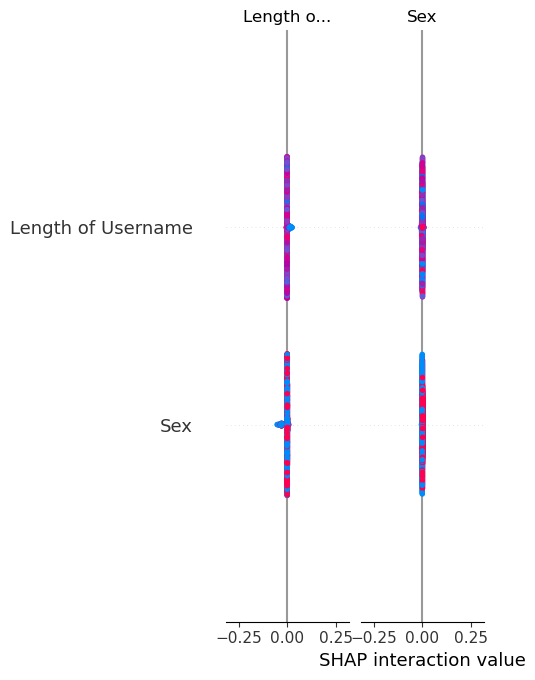

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import shap

# Carregar os dados
data = pd.read_csv('training_data.csv')

# Verificar se a coluna 'Class' existe
if 'Class' not in data.columns:
    raise ValueError("A coluna 'Class' não foi encontrada no dataset.")

# Preencher valores ausentes
data = data.fillna(data.mean())

# Codificação de variáveis categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separar variáveis independentes e dependentes
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

# Explicabilidade com SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Para classificadores com múltiplas classes, shap_values será uma lista de arrays
# Precisamos usar shap_values[1] para a classe positiva
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

# Visualização dos valores SHAP
shap.summary_plot(shap_values_to_plot, X_test, feature_names=X.columns)

